# Day 6: データ型と欠損値処理 - 基礎編

## 今日の目標
- Pythonとpandasのデータ型を理解する
- 欠損値（NaN）の基本的な処理方法を学ぶ
- データの品質を確認・改善する方法を身につける

## なぜデータ型と欠損値処理が重要？
- **データ型**: 計算の精度やメモリ使用量に影響
- **欠損値**: 分析結果の正確性に大きく影響
- **データ品質**: 機械学習の性能を左右する基礎要素

## 1. 必要なライブラリの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語表示用
import seaborn as sns

# 表示設定
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("ライブラリの読み込み完了！")

ライブラリの読み込み完了！


## 2. データ型の基礎

### 2.1 主要なデータ型

In [2]:
# サンプルデータの作成
sample_data = pd.DataFrame({
    '整数': [1, 2, 3, 4, 5],
    '小数': [1.1, 2.2, 3.3, 4.4, 5.5],
    '文字列': ['りんご', 'みかん', 'バナナ', 'ぶどう', 'いちご'],
    '日付': pd.date_range('2024-01-01', periods=5),
    '真偽値': [True, False, True, False, True]
})

print("サンプルデータ:")
print(sample_data)
print("\nデータ型:")
print(sample_data.dtypes)

サンプルデータ:
   整数   小数  文字列         日付    真偽値
0   1  1.1  りんご 2024-01-01   True
1   2  2.2  みかん 2024-01-02  False
2   3  3.3  バナナ 2024-01-03   True
3   4  4.4  ぶどう 2024-01-04  False
4   5  5.5  いちご 2024-01-05   True

データ型:
整数              int64
小数            float64
文字列            object
日付     datetime64[ns]
真偽値              bool
dtype: object


### 2.2 データ型の確認と変換

In [3]:
# より詳細な情報を表示
print("データの詳細情報:")
print(sample_data.info())
print("\nメモリ使用量:")
print(sample_data.memory_usage(deep=True))

データの詳細情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   整数      5 non-null      int64         
 1   小数      5 non-null      float64       
 2   文字列     5 non-null      object        
 3   日付      5 non-null      datetime64[ns]
 4   真偽値     5 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 297.0+ bytes
None

メモリ使用量:
Index    132
整数        40
小数        40
文字列      440
日付        40
真偽値        5
dtype: int64


In [4]:
# データ型の変換例
conversion_df = pd.DataFrame({
    '数値（文字列）': ['100', '200', '300', '400', '500'],
    '小数（文字列）': ['1.5', '2.5', '3.5', '4.5', '5.5'],
    'カテゴリ': ['小', '中', '大', '小', '中']
})

print("変換前:")
print(conversion_df.dtypes)
print("\nデータ:")
print(conversion_df)

# データ型を変換
conversion_df['数値（文字列）'] = conversion_df['数値（文字列）'].astype('int64')
conversion_df['小数（文字列）'] = conversion_df['小数（文字列）'].astype('float64')

# カテゴリ型への変換とメモリ効率化を行っている
# astype('category'): 実際の変換＆メモリ効率化を実行
conversion_df['カテゴリ'] = conversion_df['カテゴリ'].astype('category')

print("\n変換後:")
print(conversion_df.dtypes)

print("\nカテゴリデータの詳細:")
# cat.categories: 変換後の状態を確認するための表示機能
print(conversion_df['カテゴリ'].cat.categories)

変換前:
数値（文字列）    object
小数（文字列）    object
カテゴリ       object
dtype: object

データ:
  数値（文字列） 小数（文字列） カテゴリ
0     100     1.5    小
1     200     2.5    中
2     300     3.5    大
3     400     4.5    小
4     500     5.5    中

変換後:
数値（文字列）       int64
小数（文字列）     float64
カテゴリ       category
dtype: object

カテゴリデータの詳細:
Index(['中', '大', '小'], dtype='object')


## 3. 欠損値の基礎

### 3.1 欠損値のあるデータを作成

In [5]:
# 欠損値を含むサンプルデータ
np.random.seed(42)

# 学生の成績データを模擬
students_data = {
    '学生ID': range(1, 21),
    '名前': [f'学生{i}' for i in range(1, 21)],
    '数学': [85, 92, None, 78, 88, 95, None, 82, 90, 87, 
             None, 79, 93, 86, None, 91, 84, 89, 77, 94],
    '英語': [78, None, 85, 92, None, 88, 79, None, 86, 90,
             83, None, 87, None, 91, 84, None, 89, 93, 80],
    '理科': [None, 88, 92, None, 85, 90, 87, 83, None, 91,
             89, 86, None, 94, 82, None, 88, 85, 90, None],
    '出席率': [95.5, 98.2, 87.3, None, 92.1, 99.0, 85.7, 91.4, None, 96.8,
              88.9, 93.2, None, 97.1, 89.6, 94.3, None, 90.7, 95.8, 92.5]
}

df = pd.DataFrame(students_data)
print("学生の成績データ（欠損値あり）:")
print(df)

学生の成績データ（欠損値あり）:
    学生ID    名前    数学    英語    理科   出席率
0      1   学生1  85.0  78.0   NaN  95.5
1      2   学生2  92.0   NaN  88.0  98.2
2      3   学生3   NaN  85.0  92.0  87.3
3      4   学生4  78.0  92.0   NaN   NaN
4      5   学生5  88.0   NaN  85.0  92.1
5      6   学生6  95.0  88.0  90.0  99.0
6      7   学生7   NaN  79.0  87.0  85.7
7      8   学生8  82.0   NaN  83.0  91.4
8      9   学生9  90.0  86.0   NaN   NaN
9     10  学生10  87.0  90.0  91.0  96.8
10    11  学生11   NaN  83.0  89.0  88.9
11    12  学生12  79.0   NaN  86.0  93.2
12    13  学生13  93.0  87.0   NaN   NaN
13    14  学生14  86.0   NaN  94.0  97.1
14    15  学生15   NaN  91.0  82.0  89.6
15    16  学生16  91.0  84.0   NaN  94.3
16    17  学生17  84.0   NaN  88.0   NaN
17    18  学生18  89.0  89.0  85.0  90.7
18    19  学生19  77.0  93.0  90.0  95.8
19    20  学生20  94.0  80.0   NaN  92.5


### 3.2 欠損値の確認

In [6]:
# 欠損値の確認方法
print("欠損値の有無（True=欠損値）:")
print(df.isnull().head(10))

# （ Trueは 1、Falseは 0 として計算）
print("\n各列の欠損値数:")
print(df.isnull().sum())

print("\n欠損値の割合（%）:")
print((df.isnull().sum() / len(df) * 100).round(2))

print("\nデータの基本情報:")
print(df.info())

欠損値の有無（True=欠損値）:
    学生ID     名前     数学     英語     理科    出席率
0  False  False  False  False   True  False
1  False  False  False   True  False  False
2  False  False   True  False  False  False
3  False  False  False  False   True   True
4  False  False  False   True  False  False
5  False  False  False  False  False  False
6  False  False   True  False  False  False
7  False  False  False   True  False  False
8  False  False  False  False   True   True
9  False  False  False  False  False  False

各列の欠損値数:
学生ID    0
名前      0
数学      4
英語      6
理科      6
出席率     4
dtype: int64

欠損値の割合（%）:
学生ID     0.0
名前       0.0
数学      20.0
英語      30.0
理科      30.0
出席率     20.0
dtype: float64

データの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学生ID    20 non-null     int64  
 1   名前      20 non-null     object 
 2   数学      16 non-null     float64
 3   英語     

### 3.3 欠損値の可視化

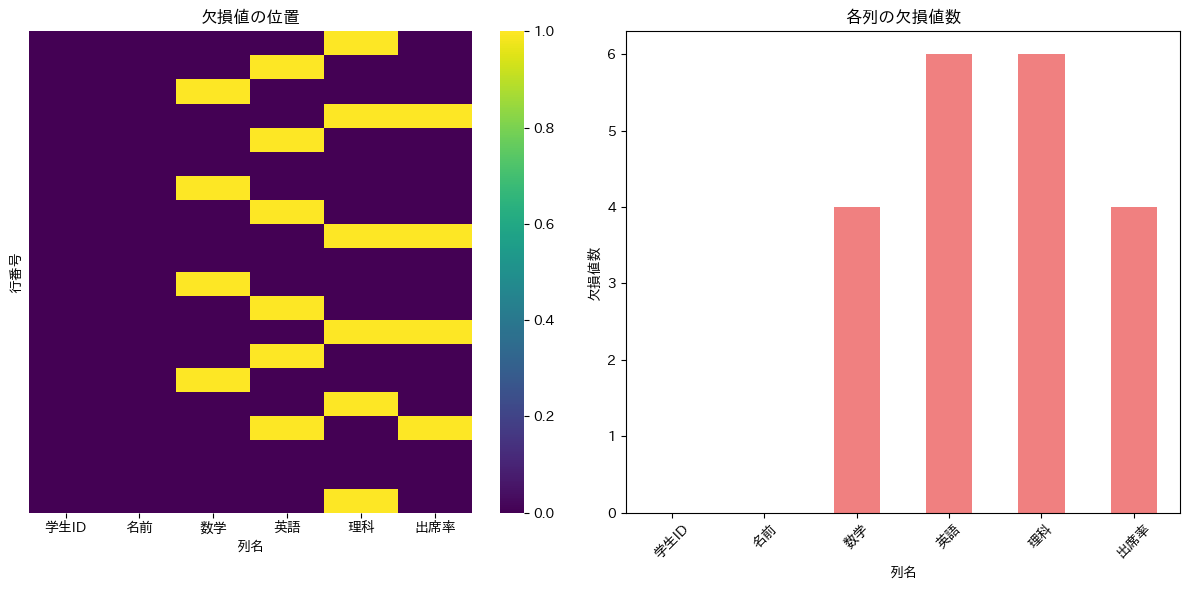

In [7]:
# 欠損値パターンの可視化
plt.figure(figsize=(12, 6))

# 1. 欠損値の位置を可視化
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('欠損値の位置')
plt.xlabel('列名')
plt.ylabel('行番号')

# 2. 欠損値の数を棒グラフで表示
plt.subplot(1, 2, 2)
missing_counts = df.isnull().sum()
missing_counts.plot(kind='bar', color='lightcoral')
plt.title('各列の欠損値数')
plt.xlabel('列名')
plt.ylabel('欠損値数')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. 基本的な欠損値処理

### 4.1 欠損値の削除

In [8]:
# 元のデータのサイズ
print(f"元のデータサイズ: {df.shape}")

# 方法1: 欠損値がある行を全て削除
# dropna()はデータクリーニングの基本的なメソッドですが、使いすぎると重要なデータまで失ってしまうので注意が必要です！
df_dropna_rows = df.dropna()
print(f"欠損値のある行を削除後: {df_dropna_rows.shape}")
print("削除後のデータ:")
print(df_dropna_rows)

# 方法2: 特定の列の欠損値がある行のみ削除
df_dropna_math = df.dropna(subset=['数学'])
print(f"\n数学の欠損値のある行のみ削除後: {df_dropna_math.shape}")
print("数学の欠損データのみ削除後のデータ:")
print(df_dropna_math)

元のデータサイズ: (20, 6)
欠損値のある行を削除後: (4, 6)
削除後のデータ:
    学生ID    名前    数学    英語    理科   出席率
5      6   学生6  95.0  88.0  90.0  99.0
9     10  学生10  87.0  90.0  91.0  96.8
17    18  学生18  89.0  89.0  85.0  90.7
18    19  学生19  77.0  93.0  90.0  95.8

数学の欠損値のある行のみ削除後: (16, 6)
数学の欠損データのみ削除後のデータ:
    学生ID    名前    数学    英語    理科   出席率
0      1   学生1  85.0  78.0   NaN  95.5
1      2   学生2  92.0   NaN  88.0  98.2
3      4   学生4  78.0  92.0   NaN   NaN
4      5   学生5  88.0   NaN  85.0  92.1
5      6   学生6  95.0  88.0  90.0  99.0
7      8   学生8  82.0   NaN  83.0  91.4
8      9   学生9  90.0  86.0   NaN   NaN
9     10  学生10  87.0  90.0  91.0  96.8
11    12  学生12  79.0   NaN  86.0  93.2
12    13  学生13  93.0  87.0   NaN   NaN
13    14  学生14  86.0   NaN  94.0  97.1
15    16  学生16  91.0  84.0   NaN  94.3
16    17  学生17  84.0   NaN  88.0   NaN
17    18  学生18  89.0  89.0  85.0  90.7
18    19  学生19  77.0  93.0  90.0  95.8
19    20  学生20  94.0  80.0   NaN  92.5


### 4.2 欠損値の補完（基本的な方法）

In [14]:
# データのコピーを作成（元データを保持）
df_filled = df.copy()

print("補完前の欠損値数:")
print(df_filled.isnull().sum())

# 方法1: 平均値で補完
df_filled['数学'] = df_filled['数学'].fillna(df_filled['数学'].mean())
print(f"\n数学の平均値: {df['数学'].mean():.2f}")

# 方法2: 中央値で補完
df_filled['英語'] = df_filled['英語'].fillna(df_filled['英語'].median())
print(f"英語の中央値: {df['英語'].median():.2f}")

# 方法3: 最頻値で補完（文字列データに有効）
# 理科は前方補完（forward fill）
# 新しい推奨方法: ffill()を使用
df_filled['理科'] = df_filled['理科'].ffill()  # fillna(method='ffill')の代わり

# 方法4: 固定値で補完
df_filled['出席率'] = df_filled['出席率'].fillna(90.0)  # 90%で補完

print("\n補完後の欠損値数:")
print(df_filled.isnull().sum())

print("\n補完後のデータ（最初の10行）:")
print(df_filled.head(10))

補完前の欠損値数:
学生ID    0
名前      0
数学      4
英語      6
理科      6
出席率     4
dtype: int64

数学の平均値: 86.88
英語の中央値: 86.50

補完後の欠損値数:
学生ID    0
名前      0
数学      0
英語      0
理科      1
出席率     0
dtype: int64

補完後のデータ（最初の10行）:
   学生ID    名前      数学    英語    理科   出席率
0     1   学生1  85.000  78.0   NaN  95.5
1     2   学生2  92.000  86.5  88.0  98.2
2     3   学生3  86.875  85.0  92.0  87.3
3     4   学生4  78.000  92.0  92.0  90.0
4     5   学生5  88.000  86.5  85.0  92.1
5     6   学生6  95.000  88.0  90.0  99.0
6     7   学生7  86.875  79.0  87.0  85.7
7     8   学生8  82.000  86.5  83.0  91.4
8     9   学生9  90.000  86.0  83.0  90.0
9    10  学生10  87.000  90.0  91.0  96.8


## fillna()の基本
fillna()は欠損値を指定した値で埋めるメソッド

df['列名'].fillna(埋める値)

### なぜ平均値と中央値を使い分ける？
- 平均値: 外れ値の影響を受けやすい
- 中央値: 外れ値に強い、より安定した値

## ffill()の動作
ffill() = forward fill = 直前の有効な値で欠損値を埋める

### 特徴
- 時系列データでよく使われる手法
- **「最後に確認できた値がそのまま続く」**という仮定
- 例：体温測定で欠損があった場合、前回の体温がそのまま続いていると仮定

### 対になるメソッド
df['列名'].ffill()  # 前方埋め（forward fill）
df['列名'].bfill()  # 後方埋め（backward fill）← 後ろの値で埋める

ffill()は統計的な計算（平均・中央値）ではなく、データの順序性を活用した埋め方

### 4.3 補完方法の比較

In [15]:
# 数学の点数について、補完方法による違いを比較
math_scores = df['数学'].dropna()  # 欠損値を除いた実際のデータ

print("数学の統計情報（補完方法による比較）:")
print(f"元データの平均: {math_scores.mean():.2f}")
print(f"元データの中央値: {math_scores.median():.2f}")
print(f"元データの標準偏差: {math_scores.std():.2f}")

# 異なる補完方法を試す
methods = {
    '平均値補完': df['数学'].fillna(df['数学'].mean()),
    '中央値補完': df['数学'].fillna(df['数学'].median()),
    '最小値補完': df['数学'].fillna(df['数学'].min()),
    '最大値補完': df['数学'].fillna(df['数学'].max())
}

print("\n補完方法別の統計:")
for method_name, filled_data in methods.items():
    print(f"{method_name}: 平均={filled_data.mean():.2f}, 標準偏差={filled_data.std():.2f}")

数学の統計情報（補完方法による比較）:
元データの平均: 86.88
元データの中央値: 87.50
元データの標準偏差: 5.70

補完方法別の統計:
平均値補完: 平均=86.88, 標準偏差=5.07
中央値補完: 平均=87.00, 標準偏差=5.07
最小値補完: 平均=84.90, 標準偏差=6.49
最大値補完: 平均=88.50, 標準偏差=6.07


# 補完前後の分布を比較
plt.figure(figsize=(15, 4))

# 数学の分布比較
plt.subplot(1, 3, 1)
# 元データを先にプロット（青）
plt.hist(df['数学'].dropna(), bins=10, alpha=0.7, label='元データ', color='blue')
# 補完後を後にプロット（赤）
plt.hist(df_filled['数学'], bins=10, alpha=0.7, label='平均値補完後', color='red')
plt.title('数学の点数分布')
plt.xlabel('点数')
plt.ylabel('人数')
plt.legend()

# 英語の分布比較
plt.subplot(1, 3, 2)
# 元データを先にプロット（青）
plt.hist(df['英語'].dropna(), bins=10, alpha=0.7, label='元データ', color='blue')
# 補完後を後にプロット（緑）
plt.hist(df_filled['英語'], bins=10, alpha=0.7, label='中央値補完後', color='green')
plt.title('英語の点数分布')
plt.xlabel('点数')
plt.ylabel('人数')
plt.legend()

# 出席率の分布比較
plt.subplot(1, 3, 3)
# 元データを先にプロット（青）
plt.hist(df['出席率'].dropna(), bins=10, alpha=0.7, label='元データ', color='blue')
# 補完後を後にプロット（オレンジ）
plt.hist(df_filled['出席率'], bins=10, alpha=0.7, label='固定値補完後', color='orange')
plt.title('出席率の分布')
plt.xlabel('出席率(%)')
plt.ylabel('人数')
plt.legend()

plt.tight_layout()
plt.show()

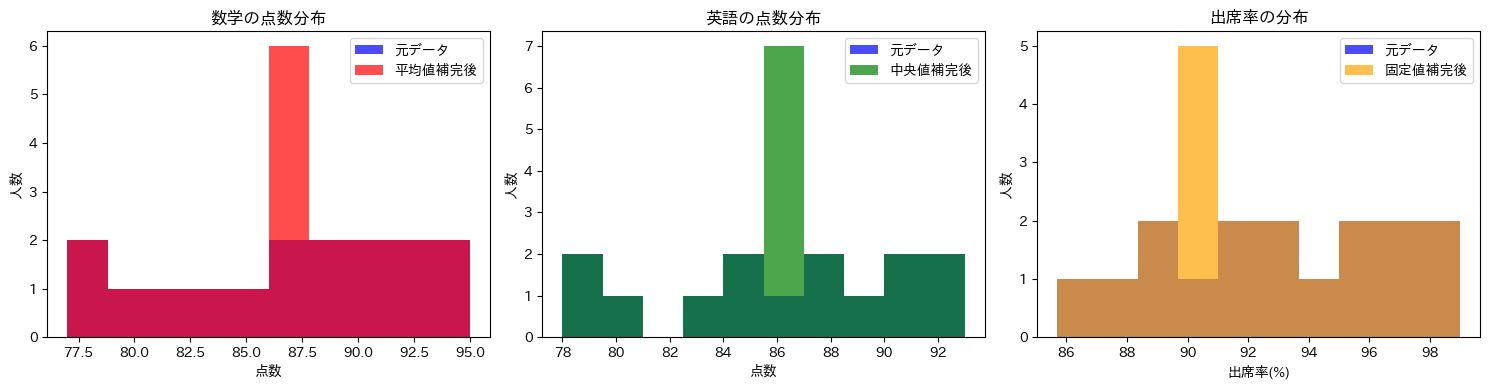

In [18]:
# 補完前後の分布を比較
plt.figure(figsize=(15, 4))

# 数学の分布比較
plt.subplot(1, 3, 1)
plt.hist(df['数学'].dropna(), bins=10, alpha=0.7, label='元データ', color='blue')
plt.hist(df_filled['数学'], bins=10, alpha=0.7, label='平均値補完後', color='red')
plt.title('数学の点数分布')
plt.xlabel('点数')
plt.ylabel('人数')
plt.legend()

# 英語の分布比較
plt.subplot(1, 3, 2)
plt.hist(df['英語'].dropna(), bins=10, alpha=0.7, label='元データ', color='blue')
plt.hist(df_filled['英語'], bins=10, alpha=0.7, label='中央値補完後', color='green')
plt.title('英語の点数分布')
plt.xlabel('点数')
plt.ylabel('人数')
plt.legend()

# 出席率の分布比較
plt.subplot(1, 3, 3)
plt.hist(df['出席率'].dropna(), bins=10, alpha=0.7, label='元データ', color='blue')
plt.hist(df_filled['出席率'], bins=10, alpha=0.7, label='固定値補完後', color='orange')
plt.title('出席率の分布')
plt.xlabel('出席率(%)')
plt.ylabel('人数')
plt.legend()

plt.tight_layout()
plt.show()

## 5. 実践的な例: ECサイトの顧客データ

In [22]:
# より実践的なデータセットを作成
np.random.seed(42)
n_customers = 100

# 顧客データの生成
customer_data = {
    '顧客ID': range(1, n_customers + 1),
    '年齢': np.random.randint(18, 70, n_customers),
    '性別': np.random.choice(['男性', '女性', None], n_customers, p=[0.45, 0.45, 0.1]),
    '年収': np.random.normal(500, 150, n_customers),  # 万円
    '購入回数': np.random.poisson(5, n_customers),
    '購入金額': np.random.gamma(2, 2000, n_customers),  # 円
    '会員ランク': np.random.choice(['ブロンズ', 'シルバー', 'ゴールド', None], 
                                  n_customers, p=[0.4, 0.3, 0.2, 0.1])
}

# 一部のデータをランダムに欠損させる
customer_df = pd.DataFrame(customer_data)

# 年収の一部を欠損させる（低所得者が回答しない傾向を模擬）
low_income_mask = customer_df['年収'] < 300
customer_df.loc[low_income_mask & (np.random.random(len(customer_df)) < 0.3), '年収'] = None

# 購入金額の一部を欠損させる
customer_df.loc[np.random.random(len(customer_df)) < 0.15, '購入金額'] = None

print("ECサイト顧客データ（最初の10行）:")
print(customer_df.head(10))

print("\n欠損値の状況:")
print(customer_df.isnull().sum())
print("\n欠損値の割合（%）:")
print((customer_df.isnull().sum() / len(customer_df) * 100).round(2))

ECサイト顧客データ（最初の10行）:
   顧客ID  年齢  性別          年収  購入回数         購入金額 会員ランク
0     1  56  男性  618.450921     6  2250.101728  シルバー
1     2  69  男性  564.723419     5  6703.692741  シルバー
2     3  46  男性  335.487155     4  2472.756561  ゴールド
3     4  32  男性  397.654765     3  4707.877316  ゴールド
4     5  60  男性  633.126742     4  3781.742504  シルバー
5     6  25  男性  590.822470     6  1395.047302  ゴールド
6     7  38  男性  391.955301     3  3170.070780  ブロンズ
7     8  56  女性  459.509935     2   929.492631  ブロンズ
8     9  36  女性  478.480666     2  1674.309858  ブロンズ
9    10  40  女性  592.550566     5  9513.686994  ブロンズ

欠損値の状況:
顧客ID      0
年齢        0
性別        8
年収        2
購入回数      0
購入金額     15
会員ランク     9
dtype: int64

欠損値の割合（%）:
顧客ID      0.0
年齢        0.0
性別        8.0
年収        2.0
購入回数      0.0
購入金額     15.0
会員ランク     9.0
dtype: float64


### 5.1 データ型の最適化

In [23]:
# データ型の最適化前
print("最適化前のメモリ使用量:")
print(customer_df.memory_usage(deep=True).sum(), "bytes")
print("\nデータ型:")
print(customer_df.dtypes)

# データ型を最適化
customer_df_optimized = customer_df.copy()

# カテゴリカルデータをcategory型に変換
customer_df_optimized['性別'] = customer_df_optimized['性別'].astype('category')
customer_df_optimized['会員ランク'] = customer_df_optimized['会員ランク'].astype('category')

# 整数の範囲を考慮して最適な型を選択
customer_df_optimized['年齢'] = customer_df_optimized['年齢'].astype('int8')
customer_df_optimized['購入回数'] = customer_df_optimized['購入回数'].astype('int16')

# 浮動小数点数の精度を調整
customer_df_optimized['年収'] = customer_df_optimized['年収'].astype('float32')
customer_df_optimized['購入金額'] = customer_df_optimized['購入金額'].astype('float32')

print("\n最適化後のメモリ使用量:")
print(customer_df_optimized.memory_usage(deep=True).sum(), "bytes")
print("\n最適化後のデータ型:")
print(customer_df_optimized.dtypes)

# メモリ削減率を計算
before = customer_df.memory_usage(deep=True).sum()
after = customer_df_optimized.memory_usage(deep=True).sum()
reduction = (before - after) / before * 100
print(f"\nメモリ使用量削減: {reduction:.1f}%")

最適化前のメモリ使用量:
20642 bytes

データ型:
顧客ID       int64
年齢         int64
性別        object
年収       float64
購入回数       int64
購入金額     float64
会員ランク     object
dtype: object

最適化後のメモリ使用量:
2890 bytes

最適化後のデータ型:
顧客ID        int64
年齢           int8
性別       category
年収        float32
購入回数        int16
購入金額      float32
会員ランク    category
dtype: object

メモリ使用量削減: 86.0%


### 5.2 業務ロジックに基づく欠損値処理

In [24]:
# 業務ロジックを考慮した欠損値処理
customer_processed = customer_df_optimized.copy()

# 1. 性別の欠損値を「不明」で補完
customer_processed['性別'] = customer_processed['性別'].cat.add_categories(['不明'])
customer_processed['性別'] = customer_processed['性別'].fillna('不明')

# 2. 年収の欠損値を年齢グループの中央値で補完
def fill_income_by_age_group(row):
    if pd.isna(row['年収']):
        age = row['年齢']
        if age < 30:
            age_group = customer_processed[customer_processed['年齢'] < 30]
        elif age < 50:
            age_group = customer_processed[(customer_processed['年齢'] >= 30) & 
                                         (customer_processed['年齢'] < 50)]
        else:
            age_group = customer_processed[customer_processed['年齢'] >= 50]
        
        return age_group['年収'].median()
    return row['年収']

customer_processed['年収'] = customer_processed.apply(fill_income_by_age_group, axis=1)

# 3. 購入金額の欠損値を購入回数との関係を考慮して補完
# 購入回数が多い人ほど購入金額も多い傾向があると仮定
purchase_relation = customer_processed.dropna(subset=['購入金額']).groupby('購入回数')['購入金額'].median()

def fill_purchase_amount(row):
    if pd.isna(row['購入金額']):
        purchase_count = row['購入回数']
        if purchase_count in purchase_relation.index:
            return purchase_relation[purchase_count]
        else:
            return customer_processed['購入金額'].median()
    return row['購入金額']

customer_processed['購入金額'] = customer_processed.apply(fill_purchase_amount, axis=1)

# 4. 会員ランクの欠損値を「ブロンズ」（最低ランク）で補完
customer_processed['会員ランク'] = customer_processed['会員ランク'].cat.add_categories(['未設定'])
customer_processed['会員ランク'] = customer_processed['会員ランク'].fillna('ブロンズ')

print("処理後の欠損値数:")
print(customer_processed.isnull().sum())

print("\n処理後のデータ概要:")
print(customer_processed.describe())

処理後の欠損値数:
顧客ID     0
年齢       0
性別       0
年収       0
購入回数     0
購入金額     0
会員ランク    0
dtype: int64

処理後のデータ概要:
             顧客ID          年齢          年収        購入回数         購入金額
count  100.000000  100.000000  100.000000  100.000000   100.000000
mean    50.500000   43.350000  499.535958    5.160000  3774.161332
std     29.011492   14.904663  148.218731    2.431776  2109.385656
min      1.000000   19.000000  152.289764    0.000000   139.186264
25%     25.750000   31.750000  397.472000    4.000000  2369.280640
50%     50.500000   42.000000  496.924805    5.000000  3303.475586
75%     75.250000   57.000000  593.196915    7.000000  5248.515503
max    100.000000   69.000000  959.164307   12.000000  9513.686523


## 6. 練習問題

### 練習1: 基本的な欠損値処理

In [28]:
# 練習用データ
practice_data = pd.DataFrame({
    '商品ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '価格': [1000, 1500, None, 2000, None, 1800, 1200, None, 1600, 1400],
    'カテゴリ': ['食品', None, '衣類', '食品', '家電', None, '食品', '衣類', None, '家電'],
    '在庫数': [50, 30, 20, None, 100, 80, None, 40, 60, None]
})

print("練習用データ:")
print(practice_data)
print("\n欠損値の状況:")
print(practice_data.isnull().sum())

# TODO: 以下の処理を実行してください
# 1. 価格の欠損値を平均値で補完
# 2. カテゴリの欠損値を最頻値で補完
# 3. 在庫数の欠損値を中央値で補完
# 4. 処理後のデータを表示

# ここにコードを書いてください
# 練習1の解答例
practice_solved = practice_data.copy()

# 1. 価格の欠損値を平均値で補完
practice_solved['価格'] = practice_solved['価格'].fillna(practice_solved['価格'].mean())

# 2. カテゴリの欠損値を最頻値で補完
most_frequent_category = practice_solved['カテゴリ'].mode()[0]
practice_solved['カテゴリ'] = practice_solved['カテゴリ'].fillna(most_frequent_category)

# 3. 在庫数の欠損値を中央値で補完
practice_solved['在庫数'] = practice_solved['在庫数'].fillna(practice_solved['在庫数'].median())

print("練習1 解答:")
print(practice_solved)
print("\n欠損値数:")
print(practice_solved.isnull().sum())

練習用データ:
   商品ID      価格  カテゴリ    在庫数
0     1  1000.0    食品   50.0
1     2  1500.0  None   30.0
2     3     NaN    衣類   20.0
3     4  2000.0    食品    NaN
4     5     NaN    家電  100.0
5     6  1800.0  None   80.0
6     7  1200.0    食品    NaN
7     8     NaN    衣類   40.0
8     9  1600.0  None   60.0
9    10  1400.0    家電    NaN

欠損値の状況:
商品ID    0
価格      3
カテゴリ    3
在庫数     3
dtype: int64
練習1 解答:
   商品ID      価格 カテゴリ    在庫数
0     1  1000.0   食品   50.0
1     2  1500.0   食品   30.0
2     3  1500.0   衣類   20.0
3     4  2000.0   食品   50.0
4     5  1500.0   家電  100.0
5     6  1800.0   食品   80.0
6     7  1200.0   食品   50.0
7     8  1500.0   衣類   40.0
8     9  1600.0   食品   60.0
9    10  1400.0   家電   50.0

欠損値数:
商品ID    0
価格      0
カテゴリ    0
在庫数     0
dtype: int64


### 練習2: データ型の最適化

In [29]:
# TODO: 上記の練習用データについて、適切なデータ型に変換してください
# ヒント:
# - カテゴリはcategory型
# - 商品IDは適切な整数型
# - 価格と在庫数は適切な数値型

# ここにコードを書いてください

practice_optimized = practice_solved.copy()

print("最適化前のデータ型:")
print(practice_optimized.dtypes)
print("最適化前のメモリ使用量:", practice_optimized.memory_usage(deep=True).sum(), "bytes")

# データ型の最適化
practice_optimized['商品ID'] = practice_optimized['商品ID'].astype('int8')
practice_optimized['価格'] = practice_optimized['価格'].astype('int16')
practice_optimized['カテゴリ'] = practice_optimized['カテゴリ'].astype('category')
practice_optimized['在庫数'] = practice_optimized['在庫数'].astype('int16')

print("\n最適化後のデータ型:")
print(practice_optimized.dtypes)
print("最適化後のメモリ使用量:", practice_optimized.memory_usage(deep=True).sum(), "bytes")

print("\n最適化後のデータ:")
print(practice_optimized)

最適化前のデータ型:
商品ID      int64
価格      float64
カテゴリ     object
在庫数     float64
dtype: object
最適化前のメモリ使用量: 1232 bytes

最適化後のデータ型:
商品ID        int8
価格         int16
カテゴリ    category
在庫数        int16
dtype: object
最適化後のメモリ使用量: 579 bytes

最適化後のデータ:
   商品ID    価格 カテゴリ  在庫数
0     1  1000   食品   50
1     2  1500   食品   30
2     3  1500   衣類   20
3     4  2000   食品   50
4     5  1500   家電  100
5     6  1800   食品   80
6     7  1200   食品   50
7     8  1500   衣類   40
8     9  1600   食品   60
9    10  1400   家電   50


## 7. まとめ

### 今日学んだポイント
1. **データ型の重要性**
   - メモリ使用量の最適化
   - 計算の精度向上
   - カテゴリカルデータの効率的な処理

2. **欠損値処理の基本戦略**
   - 削除: データ量が十分で欠損が少ない場合
   - 補完: データを保持したい場合
   - 業務ロジックの考慮: 実用的な処理

3. **補完方法の選択基準**
   - 平均値: 正規分布に近いデータ
   - 中央値: 外れ値の影響を受けやすいデータ
   - 最頻値: カテゴリカルデータ
   - 業務ルール: 実際のビジネス要件に基づく処理

### 次のステップ
- より高度な補完手法（KNN補完、回帰補完）
- 欠損値パターンの分析
- 時系列データの欠損値処理

## 解答例

In [ ]:
# 練習1の解答例
practice_solved = practice_data.copy()

# 1. 価格の欠損値を平均値で補完
practice_solved['価格'] = practice_solved['価格'].fillna(practice_solved['価格'].mean())

# 2. カテゴリの欠損値を最頻値で補完
most_frequent_category = practice_solved['カテゴリ'].mode()[0]
practice_solved['カテゴリ'] = practice_solved['カテゴリ'].fillna(most_frequent_category)

# 3. 在庫数の欠損値を中央値で補完
practice_solved['在庫数'] = practice_solved['在庫数'].fillna(practice_solved['在庫数'].median())

print("練習1 解答:")
print(practice_solved)
print("\n欠損値数:")
print(practice_solved.isnull().sum())

In [ ]:
# 練習2の解答例
practice_optimized = practice_solved.copy()

print("最適化前のデータ型:")
print(practice_optimized.dtypes)
print("最適化前のメモリ使用量:", practice_optimized.memory_usage(deep=True).sum(), "bytes")

# データ型の最適化
practice_optimized['商品ID'] = practice_optimized['商品ID'].astype('int8')
practice_optimized['価格'] = practice_optimized['価格'].astype('int16')
practice_optimized['カテゴリ'] = practice_optimized['カテゴリ'].astype('category')
practice_optimized['在庫数'] = practice_optimized['在庫数'].astype('int16')

print("\n最適化後のデータ型:")
print(practice_optimized.dtypes)
print("最適化後のメモリ使用量:", practice_optimized.memory_usage(deep=True).sum(), "bytes")

print("\n最適化後のデータ:")
print(practice_optimized)